Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
Flax classes are deprecated and will be removed in Diffusers v1.0.0. We recommend migrating to PyTorch classes or pinning your version of Diffusers.
/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

merges.txt: 0.00B [00:00, ?B/s]

scheduler_config.json:   0%|          | 0.00/308 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

config.json:   0%|          | 0.00/617 [00:00<?, ?B/s]

safety_checker/model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

vocab.json: 0.00B [00:00, ?B/s]

tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/547 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

unet/diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

vae/diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

`torch_dtype` is deprecated! Use `dtype` instead!


How are you feeling right now? happy


  0%|          | 0/50 [00:00<?, ?it/s]

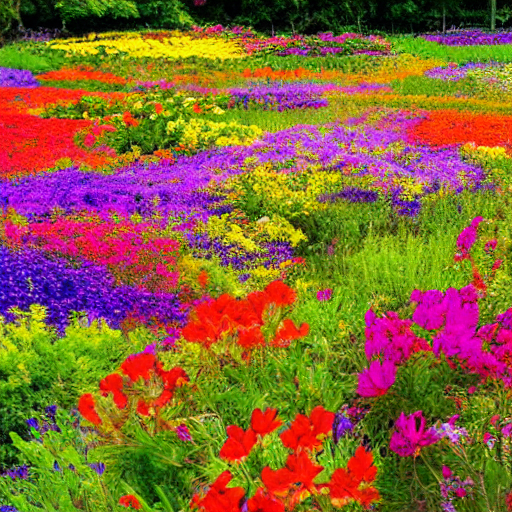

In [1]:
nb_path = "/content/Copy_of_ImageryTherapy_project.ipynb"
new_nb_path = "/content/ImageryTherapy_clean.ipynb"

!pip install diffusers transformers accelerate torch gradio --quiet

import torch
from diffusers import StableDiffusionPipeline

# Load model (no fp16 issues on GPU)
model_id = "runwayml/stable-diffusion-v1-5"

pipe = StableDiffusionPipeline.from_pretrained(
    model_id,
    torch_dtype=torch.float16
)

# Move to GPU
pipe = pipe.to("cuda")

# Emotion map
emotion_map = {
    "happy": "bright colorful landscape, sunlight, flowers, uplifting",
    "sad": "soft colors, rainy scenery, gentle mountains, comforting",
    "anxious": "calm sea, soft pastel sky, gentle waves, serene",
    "angry": "stormy sky, dark clouds, dramatic mountains, cathartic",
    "relaxed": "sunset, soft light, peaceful lake, peaceful",
    "excited": "vibrant city, dynamic lights, playful colors"
}

# Take input
user_emotion = input("How are you feeling right now? ").lower()

prompt = emotion_map.get(user_emotion, "calm nature scene, soft colors, soothing")

# Generate image
image = pipe(prompt, guidance_scale=7.5).images[0]

# Display image (this always works in Colab)
from IPython.display import display
display(image)
